# Sentimental analysis on customers review

In [3]:
# Import libs
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 
from textblob import TextBlob

In [4]:
# Read df of products
df_prod = pd.read_csv('https://raw.githubusercontent.com/r41ss4/rennes_ds/refs/heads/main/data/clust_sent/prod_clust.csv')
df_prod.head(5)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price,cluster
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,1.7 oz/ 50 mL,Size,1.7 oz/ 50 mL,...,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,53.792023,39.665802,2
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.000000,30.000000,5
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.000000,30.000000,5
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.000000,30.000000,5
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.000000,30.000000,5


In [5]:
# Review columns
df_prod.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price', 'cluster'],
      dtype='object')

In [6]:
# Review the data and how many rows have missing information in each columns
df_prod.isna().sum()

product_id            0
product_name          0
brand_id              0
brand_name            0
loves_count           0
rating                0
reviews               0
size                  0
variation_type        0
variation_value       0
variation_desc        0
ingredients           0
price_usd             0
value_price_usd       0
sale_price_usd        0
limited_edition       0
new                   0
online_only           0
out_of_stock          0
sephora_exclusive     0
highlights            0
primary_category      0
secondary_category    0
tertiary_category     0
child_count           0
child_max_price       0
child_min_price       0
cluster               0
dtype: int64

In [7]:
# Review relevant columns
df_prod[['product_id', 'product_name', 'loves_count', 'rating', 'reviews']].head()

,product_id,product_name,loves_count,rating,reviews
0,P473671,Fragrance Discovery Set,6320,3.6364,11.0
1,P473668,La Habana Eau de Parfum,3827,4.1538,13.0
2,P473662,Rainbow Bar Eau de Parfum,3253,4.2500,16.0
3,P473660,Kasbah Eau de Parfum,3018,4.4762,21.0
4,P473658,Purple Haze Eau de Parfum,2691,3.2308,13.0


In [8]:
# Read df of products
df_rev = pd.read_csv('https://raw.githubusercontent.com/r41ss4/rennes_ds/refs/heads/main/data/clean/clean_reviews.csv')
df_rev.head(5)

/var/folders/q5/bwsxp4bx3jvb0n9scz0gsk500000gn/T/ipykernel_24754/2175520951.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_rev = pd.read_csv('https://raw.githubusercontent.com/r41ss4/rennes_ds/refs/heads/main/data/clean/clean_reviews.csv')


,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,1945004256,5,1.0,0.0,2,2,0,2022-12-10,I absolutely L-O-V-E this oil. I have acne pro...,A must have!,lightMedium,green,combination,brown,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
1,5478482359,3,1.0,0.3333329856395721,3,2,1,2021-12-17,I gave this 3 stars because it give me tiny li...,it keeps oily skin under control,mediumTan,brown,oily,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
2,29002209922,5,1.0,1.0,2,0,2,2021-06-07,Works well as soon as I wash my face and pat d...,Worth the money!,lightMedium,brown,dry,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
3,7391078463,5,1.0,1.0,2,0,2,2021-05-21,"this oil helped with hydration and breakouts, ...",best face oil,lightMedium,brown,combination,blonde,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
4,1766313888,5,1.0,1.0,13,0,13,2021-03-29,This is my first product review ever so that s...,Maskne miracle,mediumTan,brown,combination,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0


In [9]:
# Review the data and how many rows have missing information in each columns
df_rev.isna().sum()

author_id                   0
rating                      0
is_recommended              0
helpfulness                 0
total_feedback_count        0
total_neg_feedback_count    0
total_pos_feedback_count    0
submission_time             0
text                        0
review_title                0
skin_tone                   0
eye_color                   0
skin_type                   0
hair_color                  0
product_id                  0
product_name                0
brand_name                  0
price_usd                   0
dtype: int64

In [10]:
# Reviews general info 
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49918 entries, 0 to 49917
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   author_id                 49918 non-null  object 
 1   rating                    49918 non-null  int64  
 2   is_recommended            49918 non-null  object 
 3   helpfulness               49918 non-null  object 
 4   total_feedback_count      49918 non-null  int64  
 5   total_neg_feedback_count  49918 non-null  int64  
 6   total_pos_feedback_count  49918 non-null  int64  
 7   submission_time           49918 non-null  object 
 8   text                      49918 non-null  object 
 9   review_title              49918 non-null  object 
 10  skin_tone                 49918 non-null  object 
 11  eye_color                 49918 non-null  object 
 12  skin_type                 49918 non-null  object 
 13  hair_color                49918 non-null  object 
 14  produc

In [11]:
# Subset data
df_rev_s = df_rev[['text','is_recommended', 'rating', 'product_id', 'product_name', 'brand_name']]
# Review 
df_rev_s.head()

,text,is_recommended,rating,product_id,product_name,brand_name
0,I absolutely L-O-V-E this oil. I have acne pro...,1.0,5,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins
1,I gave this 3 stars because it give me tiny li...,1.0,3,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins
2,Works well as soon as I wash my face and pat d...,1.0,5,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins
3,"this oil helped with hydration and breakouts, ...",1.0,5,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins
4,This is my first product review ever so that s...,1.0,5,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins


In [12]:
df_rev_s['is_recommended'].value_counts()

is_recommended
1.0                                                                                                                                                                                                                                            37498
0.0                                                                                                                                                                                                                                             8603
<bound method Series.mean of 0        1.0\n1        1.0\n2        1.0\n3        1.0\n4        1.0\n        ... \n49972    1.0\n49973    1.0\n49974    1.0\n49975    1.0\n49976    1.0\nName: is_recommended, Length: 49918, dtype: float64>     3817
Name: count, dtype: int64

In [13]:
# Calculate percentage of is_recommended True
label_pos = (df_rev_s['is_recommended'].value_counts()[1] / len(df_rev_s) *100).round(2)
label_pos

/var/folders/q5/bwsxp4bx3jvb0n9scz0gsk500000gn/T/ipykernel_24754/447904490.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_pos = (df_rev_s['is_recommended'].value_counts()[1] / len(df_rev_s) *100).round(2)


17.23

In [14]:
# Calculate percentage of is_recommended False
label_neg = (df_rev_s['is_recommended'].value_counts()[0] / len(df_rev_s) *100).round(2)
label_neg

/var/folders/q5/bwsxp4bx3jvb0n9scz0gsk500000gn/T/ipykernel_24754/3350900268.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_neg = (df_rev_s['is_recommended'].value_counts()[0] / len(df_rev_s) *100).round(2)


75.12

In [15]:
# Print percentage of is_recommended 
print("Positive is_recommended percentage", label_pos, "%")
print("Negative is_recommended percentage", label_neg, "%")

Positive is_recommended percentage 17.23 %
Negative is_recommended percentage 75.12 %


## Text Cleaning 
Symbols, spaces and other uncommon text expression can complicate sentimental analysis. The reviews must first be cleaning or prepare to avoid such problems.

In [16]:
# Import libs
import re
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import ToktokTokenizer
from nltk.stem import PorterStemmer

In [17]:
def preprocess_text(text, remove_digits=True):
    # Ensure the input is a string
    if not isinstance(text, str):
        text = str(text)
    
    # Removing HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    
    # Removing square brackets
    text = re.sub(r'\[[^]]*\]', '', text)
    
    # Removing special characters
    if remove_digits:
        text = re.sub(r'[^a-zA-Z\s]', '', text)
    else:
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Lowercasing
    text = text.lower()
    
    # Stemming
    ps = PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    
    # Removing stopwords
    stopword_list = set(stopwords.words('english'))
    tokenizer = ToktokTokenizer()
    tokens = tokenizer.tokenize(text)
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    
    return filtered_text

In [18]:
# Print original review
print('Before preprocessing \n', df_rev['text'][3])

Before preprocessing 
 this oil helped with hydration and breakouts, I love this!!


In [19]:
# Store review and clean it
df_rev['text'] = df_rev['text'].apply(preprocess_text)

/var/folders/q5/bwsxp4bx3jvb0n9scz0gsk500000gn/T/ipykernel_24754/1560165754.py:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


In [20]:
print('After preprocessing \n', df_rev_s['text'][3])

After preprocessing 
 this oil helped with hydration and breakouts, I love this!!


## Polarity based on reviews
This analysis is based on determining whether the sentiment is positive, negative, or neutral is straightforward with libraries like TextBlob or VADER.

In [21]:
# Define a function to get polarity
def get_polarity(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity

In [22]:
# Apply the function to create a polarity column
df_rev['polarity'] = df_rev['text'].apply(get_polarity)

# Display the updated DataFrame with the new polarity column
df_rev.head()

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd,polarity
0,1945004256,5,1.0,0.0,2,2,0,2022-12-10,absolut love thi oil acn prone skin use thi to...,A must have!,lightMedium,green,combination,brown,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0,0.003333
1,5478482359,3,1.0,0.3333329856395721,3,2,1,2021-12-17,gave thi star becaus give tini littl white hea...,it keeps oily skin under control,mediumTan,brown,oily,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0,0.083333
2,29002209922,5,1.0,1.0,2,0,2,2021-06-07,work well soon wash face pat dri smell amaz,Worth the money!,lightMedium,brown,dry,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0,0.000000
3,7391078463,5,1.0,1.0,2,0,2,2021-05-21,thi oil help hydrat breakout love thi,best face oil,lightMedium,brown,combination,blonde,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0,0.500000
4,1766313888,5,1.0,1.0,13,0,13,2021-03-29,thi first product review ever tell much love t...,Maskne miracle,mediumTan,brown,combination,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0,0.127083


In [23]:
# Get max of polarity
max_pol = df_rev['polarity'].max()
# Show result
max_pol

1.0

In [24]:
# Get min of polarity
min_pol = df_rev['polarity'].min()
# Show result
min_pol

-1.0

In [25]:
# Define the bins and labels
bins = [-1.1,  -0.5,   0,   0.5,  1.1]
labels = [   1,    2,   3,     4]

In [26]:
# Create the 'polarity_level' column based on the bins and labels
df_rev['polarity_level'] = pd.cut(df_rev['polarity'], 
                                bins=bins, 
                                labels=labels)
df_rev.head()

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd,polarity,polarity_level
0,1945004256,5,1.0,0.0,2,2,0,2022-12-10,absolut love thi oil acn prone skin use thi to...,A must have!,lightMedium,green,combination,brown,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0,0.003333,3
1,5478482359,3,1.0,0.3333329856395721,3,2,1,2021-12-17,gave thi star becaus give tini littl white hea...,it keeps oily skin under control,mediumTan,brown,oily,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0,0.083333,3
2,29002209922,5,1.0,1.0,2,0,2,2021-06-07,work well soon wash face pat dri smell amaz,Worth the money!,lightMedium,brown,dry,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0,0.000000,2
3,7391078463,5,1.0,1.0,2,0,2,2021-05-21,thi oil help hydrat breakout love thi,best face oil,lightMedium,brown,combination,blonde,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0,0.500000,3
4,1766313888,5,1.0,1.0,13,0,13,2021-03-29,thi first product review ever tell much love t...,Maskne miracle,mediumTan,brown,combination,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0,0.127083,3


In [27]:
# Change polarity_level as float
df_rev['polarity_level'] = df_rev['polarity_level'].astype('float')

In [28]:
# Review change
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49918 entries, 0 to 49917
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   author_id                 49918 non-null  object 
 1   rating                    49918 non-null  int64  
 2   is_recommended            49918 non-null  object 
 3   helpfulness               49918 non-null  object 
 4   total_feedback_count      49918 non-null  int64  
 5   total_neg_feedback_count  49918 non-null  int64  
 6   total_pos_feedback_count  49918 non-null  int64  
 7   submission_time           49918 non-null  object 
 8   text                      49918 non-null  object 
 9   review_title              49918 non-null  object 
 10  skin_tone                 49918 non-null  object 
 11  eye_color                 49918 non-null  object 
 12  skin_type                 49918 non-null  object 
 13  hair_color                49918 non-null  object 
 14  produc

## Intensity analysis
We use the VADER sentiment analyzer to calculate the compound score for each review, indicating the intensity of the sentiment.

In [29]:
# Instal vaderSentiment if needed
!pip install vaderSentiment

In [30]:
# Import libs
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [31]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [32]:
# Function to calculate sentiment intensity
def calculate_intensity(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

In [33]:
# Apply intensity analysis
df_rev['intensity'] = df_rev['text'].apply(calculate_intensity)

In [34]:
# Review new column
df_rev.head(8)

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,text,review_title,...,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd,polarity,polarity_level,intensity
0,1945004256,5,1.0,0.0,2,2,0,2022-12-10,absolut love thi oil acn prone skin use thi to...,A must have!,...,green,combination,brown,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0,0.003333,3.0,0.7964
1,5478482359,3,1.0,0.3333329856395721,3,2,1,2021-12-17,gave thi star becaus give tini littl white hea...,it keeps oily skin under control,...,brown,oily,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0,0.083333,3.0,-0.3182
2,29002209922,5,1.0,1.0,2,0,2,2021-06-07,work well soon wash face pat dri smell amaz,Worth the money!,...,brown,dry,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0,0.000000,2.0,0.2732
3,7391078463,5,1.0,1.0,2,0,2,2021-05-21,thi oil help hydrat breakout love thi,best face oil,...,brown,combination,blonde,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0,0.500000,3.0,0.7845
4,1766313888,5,1.0,1.0,13,0,13,2021-03-29,thi first product review ever tell much love t...,Maskne miracle,...,brown,combination,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0,0.127083,3.0,0.8176
5,1532951999,5,1.0,1.0,5,0,5,2020-09-20,use thi year complaint keep hormon skin glow b...,Best Oil,...,brown,normal,brown,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0,0.062500,3.0,0.5574
6,2168991896,5,1.0,0.8999999761581421,10,1,9,2020-08-20,first use lotu oil howev dure move unfortun br...,Shame on me for waiting this long...,...,brown,combination,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0,0.047727,3.0,-0.5574
7,5240639417,5,1.0,0.9333329796791076,15,1,14,2020-08-01,super short back stori wa teen mother work cla...,My favorite for many years,...,blue,combination,blonde,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0,0.290278,3.0,0.9531


In [35]:
# Get max of intensity
max_int = df_rev['intensity'].max()
# Show result
max_int

0.9981

In [36]:
# Get min of intensity
min_int = df_rev['intensity'].min()
# Show result
min_int

-0.9682

## Aspect-Based Sentiment Analysis
Use textblob (as there are version problems with spacy) to identify aspects (e.g., product features) and then analyze the sentiment associated with each aspect. The new column aspects is supposed to contains tuples representing the aspects (features or topics) mentioned in each review and their associated sentiment scores. 

In [37]:
# Import libs & download nltk content
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/lexi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /Users/lexi/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /Users/lexi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/lexi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [38]:
# Function to extract aspects and their sentiments using TextBlob
def extract_aspects(text):
    blob = TextBlob(text)
    aspects = []
    for sentence in blob.sentences:
        for word, tag in sentence.tags:
            if tag in ['NN', 'NNS', 'NNP', 'NNPS']:
                aspect = word
                sentiment = sentence.sentiment.polarity
                aspects.append((aspect, sentiment))
    return aspects

In [39]:
# Apply aspect extraction
df_rev['aspects'] = df_rev['text'].apply(extract_aspects)

In [40]:
# Review new column
df_rev.head(8)

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,text,review_title,...,skin_type,hair_color,product_id,product_name,brand_name,price_usd,polarity,polarity_level,intensity,aspects
0,1945004256,5,1.0,0.0,2,2,0,2022-12-10,absolut love thi oil acn prone skin use thi to...,A must have!,...,combination,brown,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0,0.003333,3.0,0.7964,"[(thi, 0.0033333333333333383), (oil, 0.0033333..."
1,5478482359,3,1.0,0.3333329856395721,3,2,1,2021-12-17,gave thi star becaus give tini littl white hea...,it keeps oily skin under control,...,oily,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0,0.083333,3.0,-0.3182,"[(star, 0.08333333333333333), (becaus, 0.08333..."
2,29002209922,5,1.0,1.0,2,0,2,2021-06-07,work well soon wash face pat dri smell amaz,Worth the money!,...,dry,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0,0.000000,2.0,0.2732,"[(work, 0.0), (face, 0.0), (pat, 0.0), (dri, 0..."
3,7391078463,5,1.0,1.0,2,0,2,2021-05-21,thi oil help hydrat breakout love thi,best face oil,...,combination,blonde,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0,0.500000,3.0,0.7845,"[(thi, 0.5), (oil, 0.5), (help, 0.5), (love, 0..."
4,1766313888,5,1.0,1.0,13,0,13,2021-03-29,thi first product review ever tell much love t...,Maskne miracle,...,combination,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0,0.127083,3.0,0.8176,"[(thi, 0.12708333333333333), (product, 0.12708..."
5,1532951999,5,1.0,1.0,5,0,5,2020-09-20,use thi year complaint keep hormon skin glow b...,Best Oil,...,normal,brown,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0,0.062500,3.0,0.5574,"[(use, 0.0625), (year, 0.0625), (complaint, 0...."
6,2168991896,5,1.0,0.8999999761581421,10,1,9,2020-08-20,first use lotu oil howev dure move unfortun br...,Shame on me for waiting this long...,...,combination,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0,0.047727,3.0,-0.5574,"[(use, 0.04772727272727273), (oil, 0.047727272..."
7,5240639417,5,1.0,0.9333329796791076,15,1,14,2020-08-01,super short back stori wa teen mother work cla...,My favorite for many years,...,combination,blonde,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0,0.290278,3.0,0.9531,"[(super, 0.29027777777777775), (wa, 0.29027777..."


## The full picture
The variety of sentimental analysis applied to review need to be focus and analysis with the products to give a better business perspective

In [41]:
# Import libs 
from collections import Counter
from scipy.stats import mode

In [42]:
# Review dataset columns
df_rev.columns

Index(['author_id', 'rating', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'text', 'review_title',
       'skin_tone', 'eye_color', 'skin_type', 'hair_color', 'product_id',
       'product_name', 'brand_name', 'price_usd', 'polarity', 'polarity_level',
       'intensity', 'aspects'],
      dtype='object')

In [43]:
# Review amount of products by unique value product_id
df_rev['product_id'].unique

<bound method Series.unique of 0        P379064
1        P379064
2        P379064
3        P379064
4        P379064
          ...   
49913    P505392
49914    P505392
49915    P505392
49916    P505392
49917    P505392
Name: product_id, Length: 49918, dtype: object>

In [44]:
# Select the specified columns
df_focus = df_rev[['product_id', 'product_name', 'brand_name', 'polarity', 'polarity_level', 'intensity', 'aspects']]
# Review df_focus
df_focus

,product_id,product_name,brand_name,polarity,polarity_level,intensity,aspects
0,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,0.003333,3.0,0.7964,"[(thi, 0.0033333333333333383), (oil, 0.0033333..."
1,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,0.083333,3.0,-0.3182,"[(star, 0.08333333333333333), (becaus, 0.08333..."
2,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,0.000000,2.0,0.2732,"[(work, 0.0), (face, 0.0), (pat, 0.0), (dri, 0..."
3,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,0.500000,3.0,0.7845,"[(thi, 0.5), (oil, 0.5), (help, 0.5), (love, 0..."
4,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,0.127083,3.0,0.8176,"[(thi, 0.12708333333333333), (product, 0.12708..."
...,...,...,...,...,...,...,...
49913,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,-0.166667,2.0,0.1779,"[(consid, -0.1666666666666667), (salicyl, -0.1..."
49914,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,0.316667,3.0,0.9186,"[(use, 0.31666666666666665), (thi, 0.316666666..."
49915,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,0.500000,3.0,0.8312,"[(time, 0.5), (month, 0.5), (care, 0.5), (dure..."
49916,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,0.250000,3.0,0.7845,"[(thi, 0.25), (dont, 0.25), (acn, 0.25), (occa..."


In [45]:
# Review amount of products by number of unique value product_id
df_focus['product_id'].nunique()

1104

In [46]:
# Review datatype before processing
df_focus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49918 entries, 0 to 49917
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      49918 non-null  object 
 1   product_name    49918 non-null  object 
 2   brand_name      49918 non-null  object 
 3   polarity        49918 non-null  float64
 4   polarity_level  49918 non-null  float64
 5   intensity       49918 non-null  float64
 6   aspects         49918 non-null  object 
dtypes: float64(3), object(4)
memory usage: 2.7+ MB


In [47]:
# Define the mode function for aspects
def calculate_mode(series):
    aspect_list = [item for sublist in series for item in sublist]
    aspect_words = [aspect[0] for aspect in aspect_list]
    most_common_aspect = Counter(aspect_words).most_common(1)
    return most_common_aspect[0][0] if most_common_aspect else None

In [48]:
# Group by product_id and calculate the mean of polarity, polarity_level, and intensity
df_sent = df_focus.groupby('product_id').agg({
    'polarity': 'mean',
    'polarity_level': 'mean',
    'intensity': 'mean',
    'aspects': calculate_mode
}).reset_index()

In [49]:
# Review new df
df_sent.head(10)

,product_id,polarity,polarity_level,intensity,aspects
0,P173622,0.285875,3.016667,0.655197,mask
1,P202935,0.266912,2.888889,0.659503,cream
2,P2046,0.340859,3.076923,0.586551,thi
3,P232920,0.251107,2.957143,0.548413,eye
4,P270600,0.184496,2.636364,0.301955,eye
5,P302900,0.213585,2.913043,0.641813,thi
6,P309409,0.162329,2.761905,0.607955,use
7,P374115,0.251960,2.869565,0.538954,thi
8,P375354,0.220040,2.863636,0.594961,skin
9,P375854,0.258477,3.066667,0.865525,cream


In [50]:
# Get df info
df_sent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1104 non-null   object 
 1   polarity        1104 non-null   float64
 2   polarity_level  1104 non-null   float64
 3   intensity       1104 non-null   float64
 4   aspects         1104 non-null   object 
dtypes: float64(3), object(2)
memory usage: 43.3+ KB


In [51]:
# Review amount of products by unique value product_id in new df
df_sent['product_id'].nunique()

1104

In [52]:
# Review amount of products by unique value product_id in original df
df_rev['product_id'].nunique()

1104

### Getting information together by merging
Merge the new dataset with the original product one only in the rows that have info on both

In [53]:
# Review amount of products by unique value product_id in product
df_prod['product_id'].nunique()

8494

In [54]:
# Review the data and how many rows have missing information in each columns
df_rev.isna().sum()

author_id                   0
rating                      0
is_recommended              0
helpfulness                 0
total_feedback_count        0
total_neg_feedback_count    0
total_pos_feedback_count    0
submission_time             0
text                        0
review_title                0
skin_tone                   0
eye_color                   0
skin_type                   0
hair_color                  0
product_id                  0
product_name                0
brand_name                  0
price_usd                   0
polarity                    0
polarity_level              0
intensity                   0
aspects                     0
dtype: int64

In [55]:
# Save the df_rev with sentimental column
df_rev.to_csv('rev_sent.csv', index=False)

In [56]:
# Merging the DataFrames on 'order_id' with an inner join to keep only matching rows
df_prodsent = pd.merge(df_prod, df_sent, 
                     on='product_id', how='inner')

In [57]:
# Review result
df_prodsent.head(10)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,secondary_category,tertiary_category,child_count,child_max_price,child_min_price,cluster,polarity,polarity_level,intensity,aspects
0,P453818,GENIUS Collagen Calming Relief,6018,Algenist,11763,4.4640,125.0,1.35 oz/ 40 mL,Size,1.35 oz/ 40 mL,...,Moisturizers,Moisturizers,0,53.792023,39.665802,0,0.208422,2.864000,0.600854,product
1,P442859,ALIVE Prebiotic Balancing Mask,6018,Algenist,14367,4.3729,118.0,1.7 oz/ 50 mL,Size,1.7 oz/ 50 mL,...,Masks,Face Masks,0,53.792023,39.665802,0,0.245385,2.974359,0.694537,skin
2,P388262,GENIUS Ultimate Anti-Aging Eye Cream,6018,Algenist,6866,3.7759,116.0,0.5 oz/ 15 mL,Size,0.5 oz/ 15 mL,...,Eye Care,Eye Creams & Treatments,0,53.792023,39.665802,2,0.219617,2.853448,0.547828,eye
3,P457694,Blue Algae Vitamin C Dark Spot Correcting Peel,6018,Algenist,11488,4.2130,108.0,1.5 oz/ 45 mL,Size,1.5 oz/ 45 mL,...,Treatments,Facial Peels,0,53.792023,39.665802,5,0.185555,2.879630,0.645811,use
4,P447504,AA (Alguronic Acid) Barrier Serum,6018,Algenist,3877,3.9700,100.0,1 oz/ 30 mL,Size,1 oz/ 30 mL,...,Treatments,Face Serums,0,53.792023,39.665802,5,0.190836,2.878788,0.584623,thi
5,P404169,POWER Advanced Wrinkle Fighter 360° Eye Serum,6018,Algenist,9082,4.0230,87.0,0.5 oz/ 15 mL,Size,0.5 oz/ 15 mL,...,Eye Care,Eye Creams & Treatments,0,53.792023,39.665802,5,0.235351,2.909091,0.553477,eye
6,P404168,POWER Advanced Wrinkle Fighter Moisturizer,6018,Algenist,5169,4.1818,77.0,2 oz/ 60 mL,Size,2 oz/ 60 mL,...,Moisturizers,Moisturizers,0,53.792023,39.665802,5,0.254018,2.948052,0.583449,thi
7,P433469,ELEVATE Advanced Retinol Serum,6018,Algenist,5451,4.1026,39.0,1 oz/ 30 mL,Size,1 oz/ 30 mL,...,Treatments,Face Serums,0,53.792023,39.665802,5,0.256045,2.897436,0.622210,thi
8,P420638,ELEVATE Advanced Lift Contouring Cream,6018,Algenist,3317,4.3243,37.0,2 oz/ 60 mL,Size,2 oz/ 60 mL,...,Moisturizers,Moisturizers,0,53.792023,39.665802,5,0.275630,3.000000,0.624724,thi
9,P456990,Mini GENIUS Liquid Collagen,6018,Algenist,8900,3.4412,34.0,0.21 oz/ 6.2 mL,Size,0.21 oz/ 6.2 mL,...,Mini Size,Perfume,0,53.792023,39.665802,2,0.198898,2.771429,0.381929,product


In [58]:
# Review info
df_prodsent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          1104 non-null   object 
 1   product_name        1104 non-null   object 
 2   brand_id            1104 non-null   int64  
 3   brand_name          1104 non-null   object 
 4   loves_count         1104 non-null   int64  
 5   rating              1104 non-null   float64
 6   reviews             1104 non-null   float64
 7   size                1104 non-null   object 
 8   variation_type      1104 non-null   object 
 9   variation_value     1104 non-null   object 
 10  variation_desc      1104 non-null   object 
 11  ingredients         1104 non-null   object 
 12  price_usd           1104 non-null   float64
 13  value_price_usd     1104 non-null   float64
 14  sale_price_usd      1104 non-null   float64
 15  limited_edition     1104 non-null   int64  
 16  new   

In [59]:
# Save the df_prodsent
df_prodsent.to_csv('prod_clust_sent.csv', index=False)

## Marketing & Sentimental Results
With the current information, it is possible to analyze wich products have a higher chance of performing better based on sentimental analysis. It is also possible to review which one are low performance with customer so that strategic decisions can be made regarding budgetting, marketing focus, and positioning within the e-commerce Sephora

In [60]:
# Identify high and low performing products based on sentiment analysis
high_performing = df_prodsent[df_prodsent['polarity'] > 0.5]
low_performing = df_prodsent[df_prodsent['polarity'] < 0]

In [61]:
# View high performing products
high_performing.head(10)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,secondary_category,tertiary_category,child_count,child_max_price,child_min_price,cluster,polarity,polarity_level,intensity,aspects
73,P395507,Extra Repair Moisture Cream,5644,Bobbi Brown,3331,4.5,2.0,1.7 oz/ 50 mL,Size,1.7 oz/ 50 mL,...,Moisturizers,Moisturizers,0,53.792023,39.665802,5,0.575289,3.500000,0.245350,product
154,P481062,"Clean Skin, Fresh Start Acne Solutions Kit",1254,CLINIQUE,2441,3.0,4.0,1.7 oz/ 50 mL,Size,1.7 oz/ 50 mL,...,Value & Gift Sets,Perfume,0,53.792023,39.665802,2,0.595139,3.750000,0.740425,thi
180,P481342,Cleansing & Hydrating Bestseller Set Bento Box,6349,DAMDAM,2206,5.0,2.0,1.7 oz/ 50 mL,Size,1.7 oz/ 50 mL,...,Value & Gift Sets,Perfume,0,53.792023,39.665802,0,0.750000,4.000000,0.619100,product
329,P481397,Revitalizing Supreme+ Bright Soft Creme Moistu...,6089,Estée Lauder,1140,5.0,1.0,1.7 oz/ 50 mL,Size,1.7 oz/ 50 mL,...,Moisturizers,Moisturizers,0,53.792023,39.665802,5,0.718750,4.000000,0.954500,moistur
368,P480604,FAB Faves Trio,5972,First Aid Beauty,3738,4.0,4.0,1.7 oz/ 50 mL,Size,1.7 oz/ 50 mL,...,Value & Gift Sets,Perfume,0,53.792023,39.665802,0,0.508333,3.250000,0.440500,thi
529,P476571,Turbo Body Lotion Energizing Gel Moisturizer w...,3297,Jack Black,326,5.0,1.0,16 oz/ 473 mL,Size,16 oz/ 473 mL,...,Moisturizers,Moisturizers,0,53.792023,39.665802,0,0.850000,4.000000,0.771700,lotion
677,P502709,Mini Mist Collection,8017,Mario Badescu,2768,4.5,2.0,1.7 oz/ 50 mL,Type,1.7 oz/ 50 mL,...,Value & Gift Sets,Perfume,0,53.792023,39.665802,0,0.508333,3.500000,0.783100,receiv
678,P500256,Mineral Sunscreen SPF 30,8017,Mario Badescu,983,5.0,2.0,1.5 oz / 44 mL,Size,1.5 oz / 44 mL,...,Sunscreen,Face Sunscreen,0,53.792023,39.665802,0,0.700000,3.500000,0.371500,goe
880,P503000,Feeling Groovy Yellow Jade Eye Massager Set,3902,SEPHORA COLLECTION,2842,5.0,2.0,1.7 oz/ 50 mL,Size,1.7 oz/ 50 mL,...,Wellness,Facial Rollers,0,53.792023,39.665802,0,0.545000,3.666667,0.920133,eye


In [62]:
# View low performing products
low_performing.head(10)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,secondary_category,tertiary_category,child_count,child_max_price,child_min_price,cluster,polarity,polarity_level,intensity,aspects
72,P504452,Mini Must Haves Skincare Set,5644,Bobbi Brown,4452,3.4286,7.0,1.7 oz/ 50 mL,Size,1.7 oz/ 50 mL,...,Mini Size,Perfume,0,53.792023,39.665802,2,-0.049351,2.285714,0.545614,thi
80,P504850,Premier Cru Fine Lines and Wrinkles Anti-Aging...,4171,Caudalie,1926,4.0000,1.0,1.7 oz/ 50 mL,Size,1.7 oz/ 50 mL,...,Value & Gift Sets,Perfume,0,53.792023,39.665802,5,-0.194444,2.000000,-0.072000,use
156,P474941,3 Step Intro Kit Type II,1254,CLINIQUE,865,2.0000,2.0,1.7 oz/ 50 mL,Size,1.7 oz/ 50 mL,...,Value & Gift Sets,Perfume,0,53.792023,39.665802,2,-0.125000,2.000000,-0.271150,wa
686,P469193,Supers Set,6226,Moon Juice,1614,1.2500,4.0,1.7 oz/ 50 mL,Size,1.7 oz/ 50 mL,...,Wellness,Beauty Supplements,0,53.792023,39.665802,2,-0.064867,2.250000,-0.042775,expir
688,P470538,SuperPower Immune Support Supplement,6226,Moon Juice,820,5.0000,1.0,30 Capsules,Size,30 Capsules,...,Wellness,Beauty Supplements,0,53.792023,39.665802,0,-0.147937,2.000000,0.585900,take
721,P500464,NuBODY - Body Toning Device,6001,NuFACE,1312,1.0000,2.0,1.7 oz/ 50 mL,Type,1.7 oz/ 50 mL,...,High Tech Tools,Anti-Aging,0,53.792023,39.665802,3,-0.125000,2.000000,-0.088950,instruct
875,P482309,Facial Cooling Wands,3902,SEPHORA COLLECTION,8525,4.0000,4.0,1.7 oz/ 50 mL,Size,1.7 oz/ 50 mL,...,High Tech Tools,Perfume,0,53.792023,39.665802,0,-0.044792,2.250000,0.197875,fridg


In [63]:
# Print high performing products
print("High Performing Products:")
print(high_performing[['product_name', 'brand_name']])

High Performing Products:
                                          product_name          brand_name
73                         Extra Repair Moisture Cream         Bobbi Brown
154         Clean Skin, Fresh Start Acne Solutions Kit            CLINIQUE
180     Cleansing & Hydrating Bestseller Set Bento Box              DAMDAM
329  Revitalizing Supreme+ Bright Soft Creme Moistu...        Estée Lauder
368                                     FAB Faves Trio    First Aid Beauty
529  Turbo Body Lotion Energizing Gel Moisturizer w...          Jack Black
677                               Mini Mist Collection       Mario Badescu
678                           Mineral Sunscreen SPF 30       Mario Badescu
880        Feeling Groovy Yellow Jade Eye Massager Set  SEPHORA COLLECTION


In [64]:
# Print low performing products
print("Low Performing Products:")
print(low_performing[['product_name', 'brand_name']])

Low Performing Products:
                                          product_name          brand_name
72                        Mini Must Haves Skincare Set         Bobbi Brown
80   Premier Cru Fine Lines and Wrinkles Anti-Aging...            Caudalie
156                           3 Step Intro Kit Type II            CLINIQUE
686                                         Supers Set          Moon Juice
688               SuperPower Immune Support Supplement          Moon Juice
721                        NuBODY - Body Toning Device              NuFACE
875                               Facial Cooling Wands  SEPHORA COLLECTION


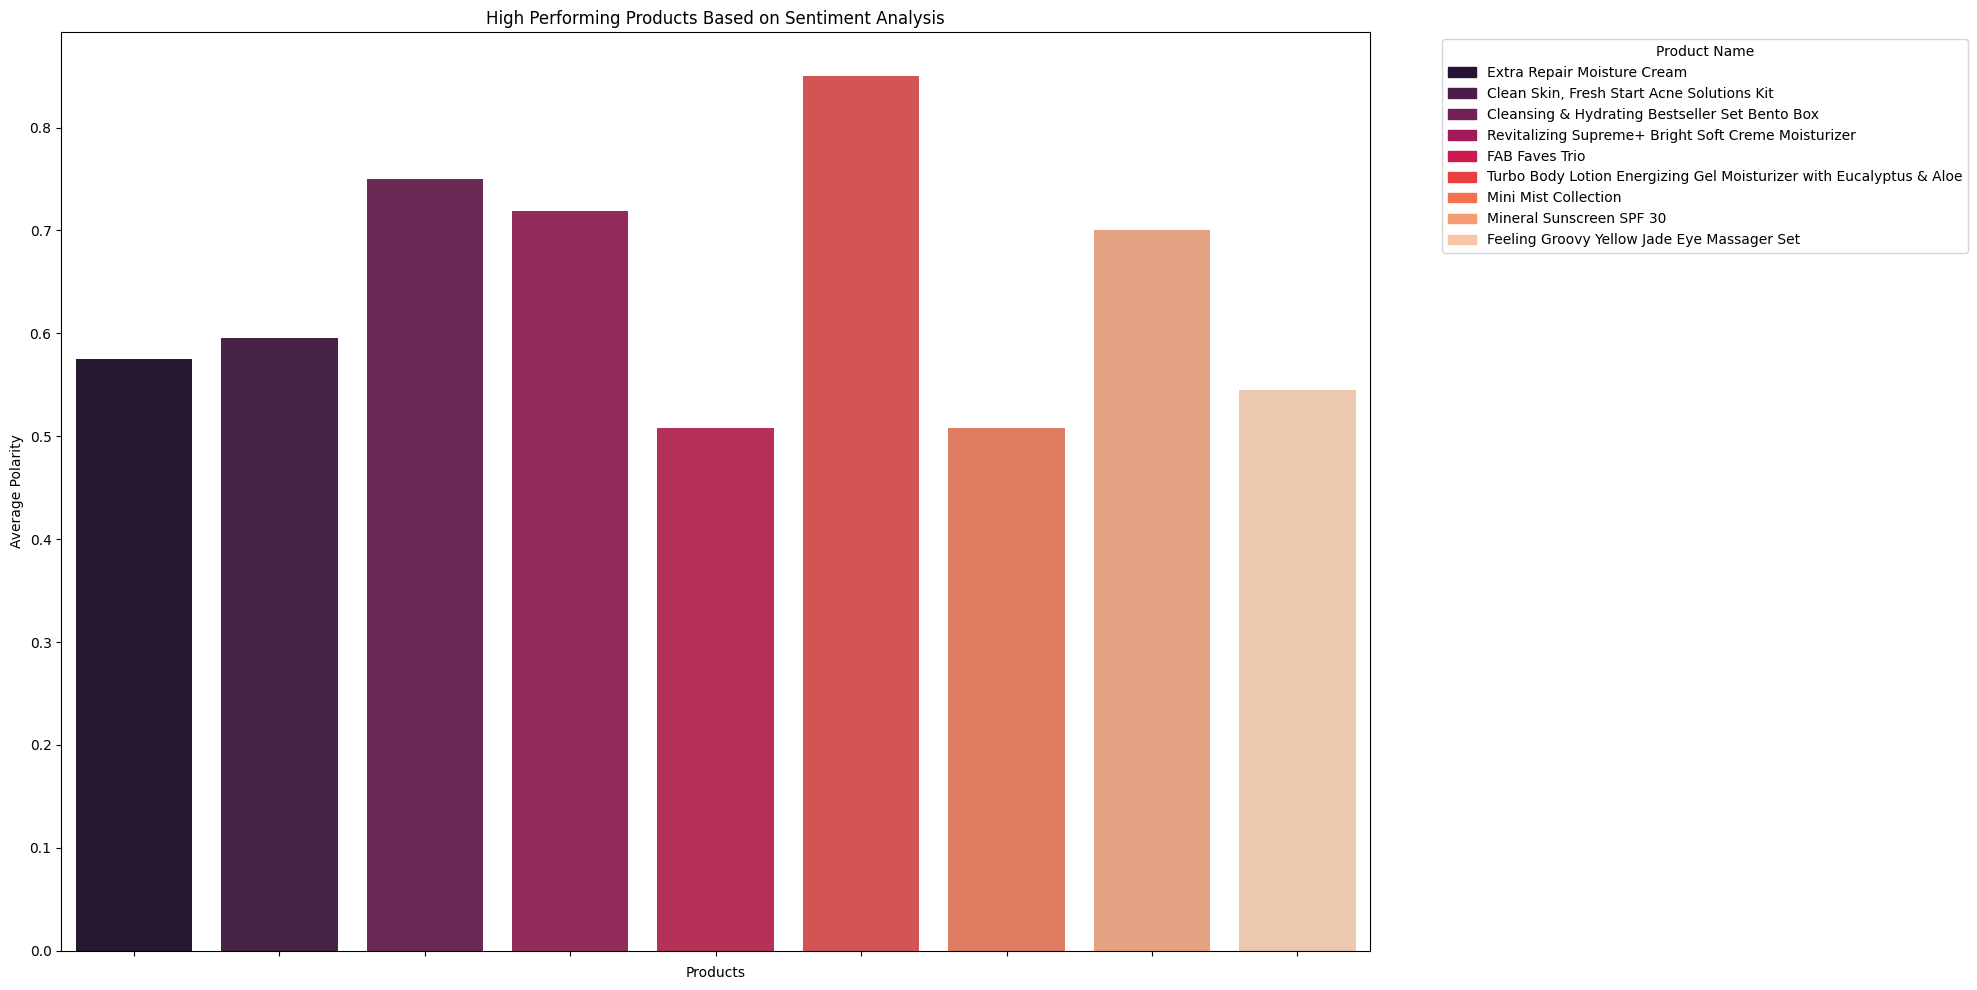

In [65]:
# Visualize high performing products
plt.figure(figsize=(20, 10))

# Create the barplot
ax = sb.barplot(x='product_name', y='polarity', data=high_performing, palette='rocket', hue='product_name', legend=False)

# Hide x-axis labels (product names)
ax.set_xticklabels([])  # This removes the x-axis labels
plt.xlabel('')  # Remove the x-axis label text

# Set y-axis label and title
plt.ylabel('Average Polarity')
plt.xlabel('Products')
plt.title('High Performing Products Based on Sentiment Analysis')

# Create a legend for the products
# Use the product names as labels for the legend
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in sb.color_palette('rocket', len(high_performing))]
labels = high_performing['product_name'].tolist()

# Add the legend outside the plot
plt.legend(handles, labels, title='Product Name', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout()

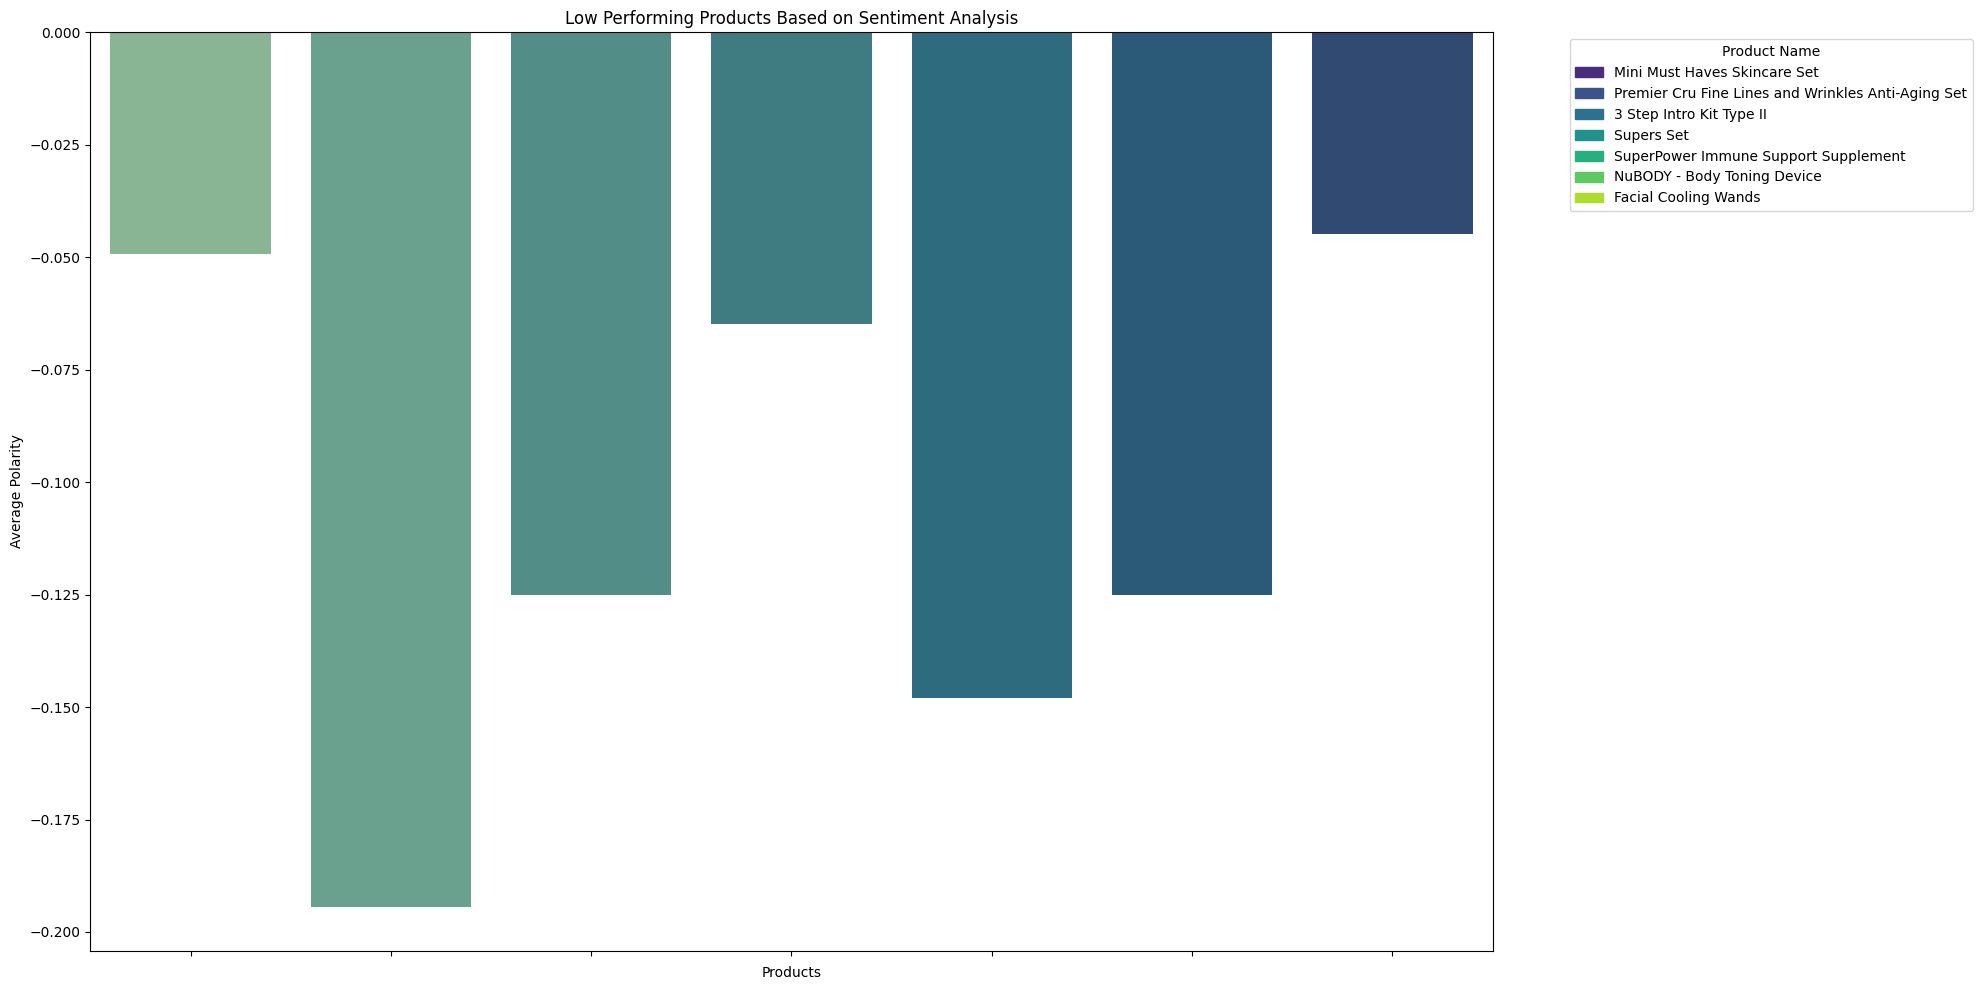

In [66]:
# Visualize low performing products
plt.figure(figsize=(20, 10))

# Create the barplot
ax = sb.barplot(x='product_name', y='polarity', data=low_performing, palette='crest', hue='product_name', legend=False)

# Hide x-axis labels (product names)
ax.set_xticklabels([])  # This removes the x-axis labels
plt.xlabel('')  # Remove the x-axis label text

# Set y-axis label and title
plt.ylabel('Average Polarity')
plt.xlabel('Products')
plt.title('Low Performing Products Based on Sentiment Analysis')

# Create a legend for the products
# Use the product names as labels for the legend
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in sb.color_palette('viridis', len(low_performing))]
labels = low_performing['product_name'].tolist()

# Add the legend outside the plot
plt.legend(handles, labels, title='Product Name', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout()

### Clustering recap
By adding the clustering analysis, we can correlated findings from both analysis together to get a full picture

In [67]:
# Import libs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [68]:
# Review the data and how many rows have missing information in each columns
df_prodsent.isna().sum()

product_id            0
product_name          0
brand_id              0
brand_name            0
loves_count           0
rating                0
reviews               0
size                  0
variation_type        0
variation_value       0
variation_desc        0
ingredients           0
price_usd             0
value_price_usd       0
sale_price_usd        0
limited_edition       0
new                   0
online_only           0
out_of_stock          0
sephora_exclusive     0
highlights            0
primary_category      0
secondary_category    0
tertiary_category     0
child_count           0
child_max_price       0
child_min_price       0
cluster               0
polarity              0
polarity_level        0
intensity             0
aspects               0
dtype: int64

In [69]:
# Review columns type
df_prodsent.dtypes

product_id             object
product_name           object
brand_id                int64
brand_name             object
loves_count             int64
rating                float64
reviews               float64
size                   object
variation_type         object
variation_value        object
variation_desc         object
ingredients            object
price_usd             float64
value_price_usd       float64
sale_price_usd        float64
limited_edition         int64
new                     int64
online_only             int64
out_of_stock            int64
sephora_exclusive       int64
highlights             object
primary_category       object
secondary_category     object
tertiary_category      object
child_count             int64
child_max_price       float64
child_min_price       float64
cluster                 int64
polarity              float64
polarity_level        float64
intensity             float64
aspects                object
dtype: object

In [70]:
# Subset to feature
features = df_prodsent[['price_usd', 'value_price_usd', 'sale_price_usd','loves_count', 'reviews','rating']]

In [71]:
# Summary statistics to spot anomalies
features.describe()      

,price_usd,value_price_usd,sale_price_usd,loves_count,reviews,rating
count,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000
mean,69.468270,107.845909,27.300921,7485.494565,44.130435,4.138640
std,90.577727,78.777252,26.616498,7535.758560,39.008998,0.588144
min,3.000000,20.000000,3.000000,0.000000,1.000000,1.000000
25%,26.000000,66.333333,25.525091,2394.500000,11.000000,3.781925
50%,45.000000,89.011878,25.525091,5301.000000,31.000000,4.221700
75%,75.000000,112.000000,25.525091,9903.000000,71.000000,4.550550
max,1900.000000,480.000000,320.000000,55347.000000,139.000000,5.000000


In [72]:
# Review type in feature
features.dtypes

price_usd          float64
value_price_usd    float64
sale_price_usd     float64
loves_count          int64
reviews            float64
rating             float64
dtype: object

In [73]:
# Review the data and how many rows have missing information in each columns
features.isna().sum()

price_usd          0
value_price_usd    0
sale_price_usd     0
loves_count        0
reviews            0
rating             0
dtype: int64

In [74]:
#Standarzation
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

### Sentiment with Clusters
As the population is of 8494 products, but the sample of reviews covers 1104 products, it is possible to evaluate how this sample of 1104 products performs in each sentimental analysis category (polarity, polarity_level and intensity) the  according to the clustering techniques used to segment all the products of the population.

Cluster 0 → Low Price, High Rating
- These products are mostly priced under $50, but have very high ratings (4.5 - 5.0).
- They are likely popular and well-rated budget products.
  
Cluster 1 → High Price, Unstable Rating
- These products cost more than $300, but their ratings vary widely (1.0 - 5.0).
- They may be luxury or premium products, but some customers feel they are not worth the price.

Cluster 2 → Affordable Market, Mixed Rating
- Mostly priced under $100, with ratings ranging from 2.0 to 5.0.
- These products belong to the mass-market segment, receiving both positive and average reviews.

Cluster 3 → Low Price, Mixed Ratings
- Priced between $0 - $250, with ratings ranging from 1.0 to 5.0.
- These are products with varied customer experiences, likely due to different user preferences.

Cluster 4 → Low Price, Moderate Rating
- Priced under $100, with ratings mostly between 3.0 - 4.0.
- These may be decent but unremarkable products, not as highly rated as Cluster 0 but still selling well.

Cluster 5 → Low Price, Polarized Ratings
- Priced between $0 - $200, but ratings are either very high (5.0) or very low (1.0).
- These products might be controversial or niche, loved by some and disliked by others (e.g., skincare products that work differently depending on skin type).

In [76]:
# Calculate average sentiment scores for each cluster
cluster_sentiments = df_prodsent.groupby('cluster').agg({
    'polarity': 'mean',
    'polarity_level': 'mean',
    'intensity': 'mean'
}).reset_index()

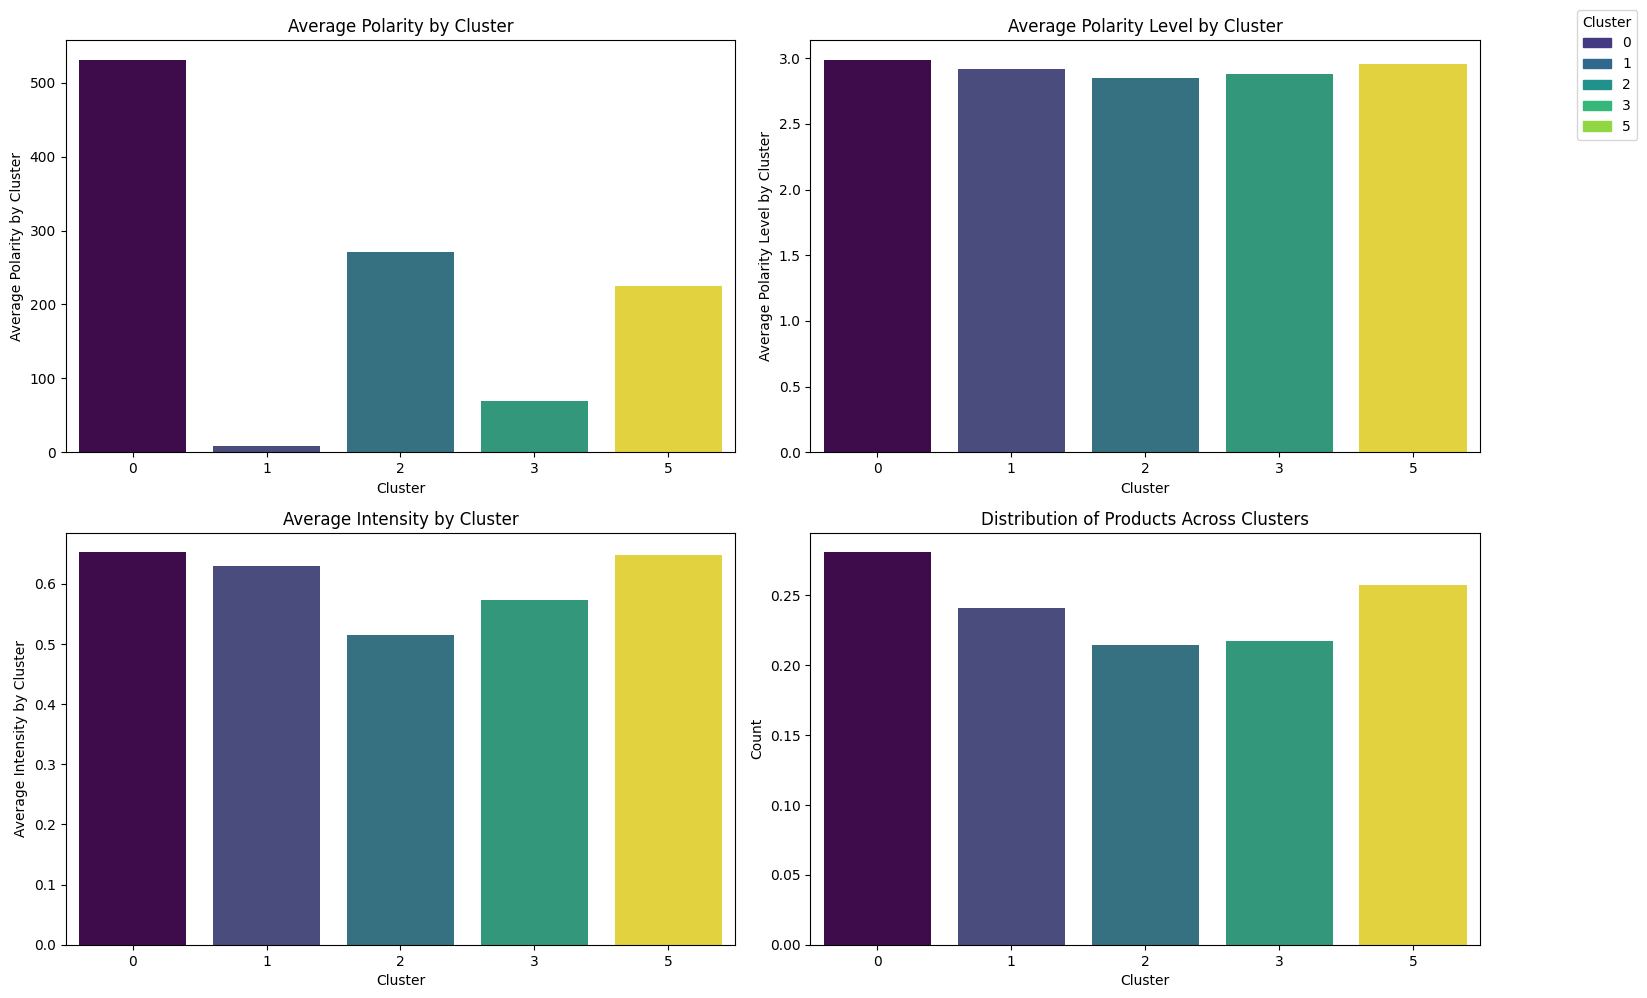

In [77]:
# Plot Clustering & Sentiment with barplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: the clustering results of Distribution of Products
sb.countplot(ax=axes[0, 0], x=df_prodsent['cluster'], palette="viridis", hue=df_prodsent['cluster'], legend=False)
axes[1, 1].set_xlabel("Cluster")
axes[1, 1].set_ylabel("Count")
axes[1, 1].set_title("Distribution of Products Across Clusters")

# Plot 2: Average Polarity Level by Cluster
sb.barplot(ax=axes[0, 1], x='cluster', y='polarity_level', data=cluster_sentiments, palette='viridis', hue='cluster', legend=False)
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Average Polarity Level by Cluster')
axes[0, 1].set_title('Average Polarity Level by Cluster')

# Plot 3: Average Intensity by Cluster
sb.barplot(ax=axes[1, 0], x='cluster', y='intensity', data=cluster_sentiments, palette='viridis', hue='cluster', legend=False)
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Average Intensity by Cluster')
axes[1, 0].set_title('Average Intensity by Cluster')

# Plot 4: Average Polarity by Cluster
sb.barplot(ax=axes[1, 1], x='cluster', y='polarity', data=cluster_sentiments, palette='viridis', hue='cluster', legend=False)
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Average Polarity by Cluster')
axes[0, 0].set_title('Average Polarity by Cluster')

# Adjust layout
plt.tight_layout()

# Create a legend for the clusters
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in sb.color_palette('viridis', len(cluster_sentiments['cluster'].unique()))]
labels = cluster_sentiments['cluster'].unique().tolist()

# Add the legend outside the plot
fig.legend(handles, labels, title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

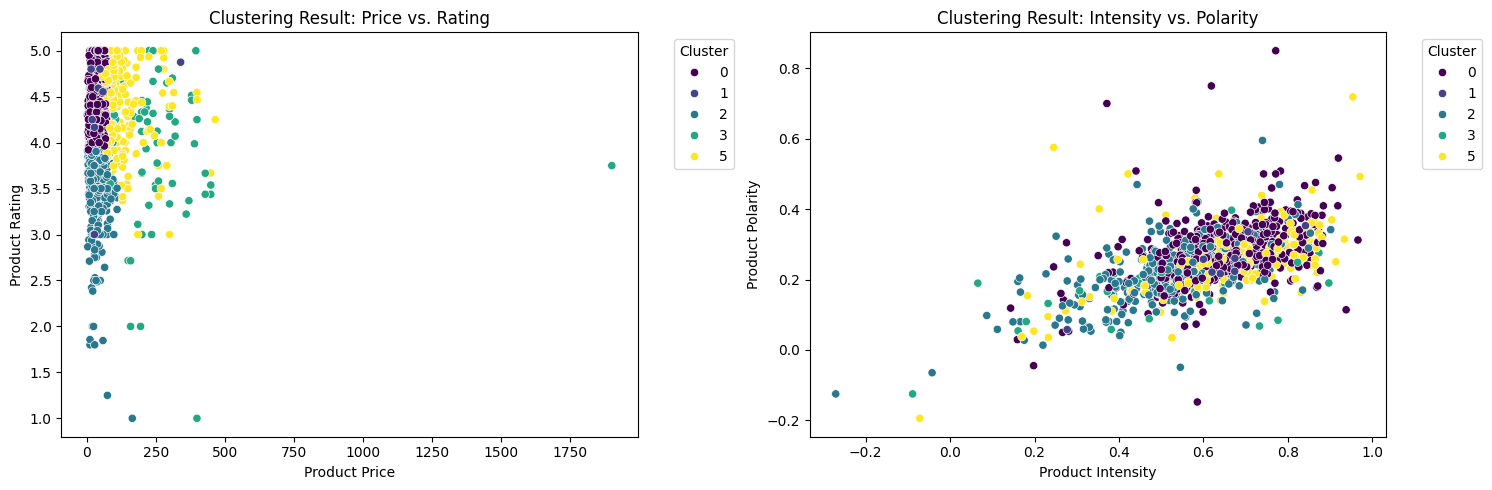

In [78]:
# Plot Clustering & Sentiment with barplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Clustering Result: Price vs. Rating
sb.scatterplot(ax=axes[0], x=df_prodsent['price_usd'], y=df_prodsent['rating'], hue=df_prodsent['cluster'], palette='viridis')
axes[0].set_xlabel('Product Price')
axes[0].set_ylabel('Product Rating')
axes[0].set_title('Clustering Result: Price vs. Rating')
axes[0].legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 2: Clustering Result: Intensity vs. Polarity
sb.scatterplot(ax=axes[1], x=df_prodsent['intensity'], y=df_prodsent['polarity'], hue=df_prodsent['cluster'], palette='viridis')
axes[1].set_xlabel('Product Intensity')
axes[1].set_ylabel('Product Polarity')
axes[1].set_title('Clustering Result: Intensity vs. Polarity')
axes[1].legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()